<a href="https://colab.research.google.com/github/brianadit24/predict_mobile_class_with_rfc/blob/main/Predict_Mobile_Class_with_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1 : Simple Thinking

In [1]:
!pip install jcopml
!pip install luwiji

     |████████████████████████████████| 102kB 4.1MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33232 sha256=7bf858d48bd3e51f8122696156ef651b76a689d50adc0e85b1070ac2611a8131
  Stored in directory: /root/.cache/pip/wheels/82/22/ce/b8b4c3400f788e5050b5b4b4d988884b8ec72b6b8751693914
Successfully built jcopml
     |████████████████████████████████| 40.3MB 106kB/s 
  Created wheel for luwiji: filename=luwiji-1.1.8-py2.py3-none-any.whl size=40371111 sha256=cefc563bd56936bdce9a961a9574ee0d6f12e3a6542a70c670fb52647ce559a6
  Stored in directory: /root/.cache/pip/wheels/a8/b7/68/084583dfcdac4fbe9ef870c03065173091c7b7c481b946a8ee
Successfully built luwiji


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [18]:
from luwiji.random_forest import illustration, demo

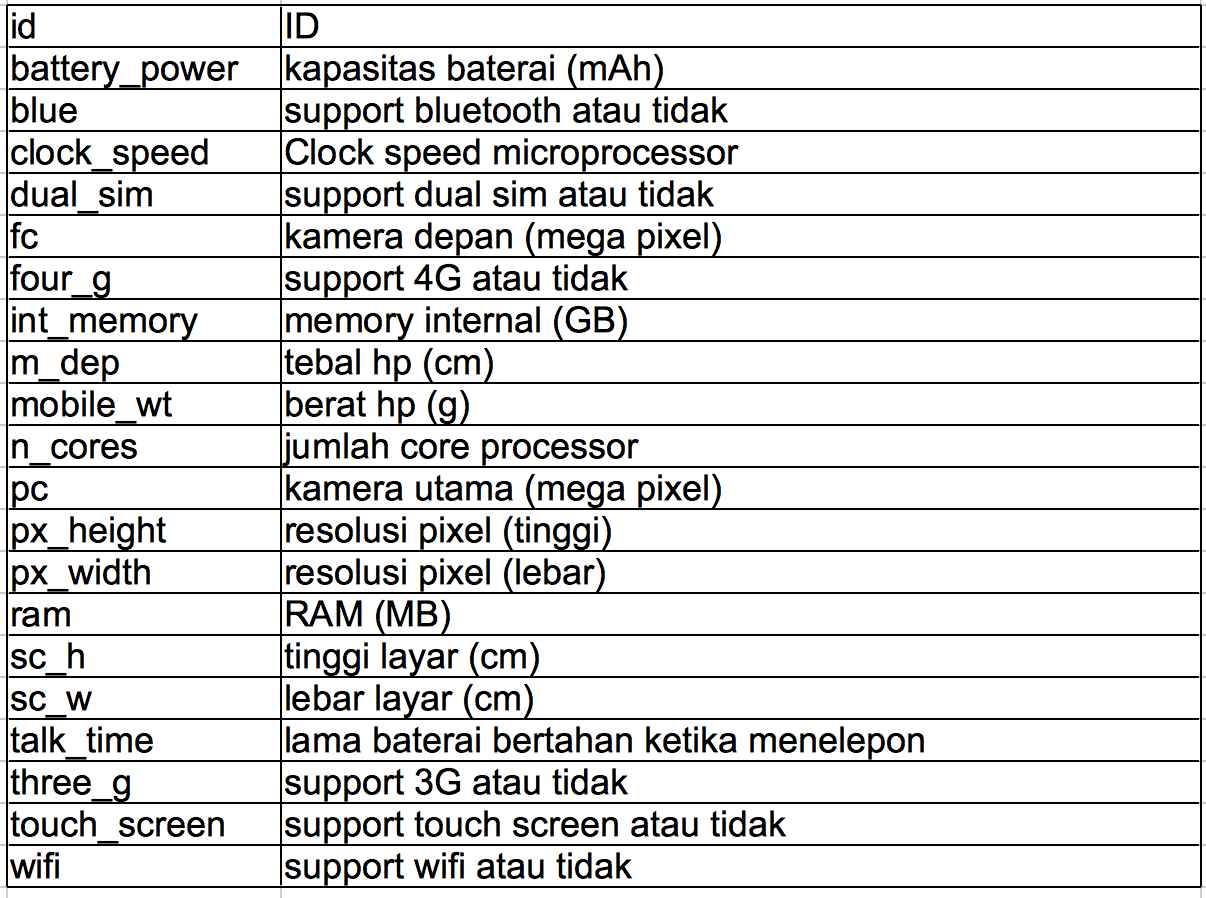

In [4]:
illustration.nomenklatur_mobile

# Import Data

In [5]:
# Import Data & Show Data
df = pd.read_csv("/content/drive/MyDrive/supervised_learning-master/06 - RF/data/mobile.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


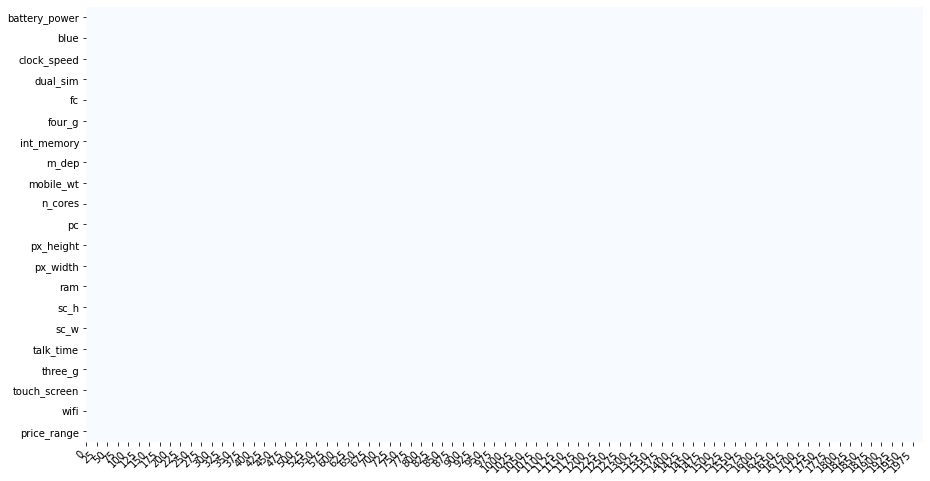

In [6]:
# Check Missing Values
plot_missing_value(df)

# Dataset Splitting

In [8]:
X = df.drop(columns='price_range')
y = df.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

# Training

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [11]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
469,1845,1,0.5,1,10,0,61,0.3,96,1,12,292,695,1731,9,5,6,0,0,0
565,1271,1,0.5,0,12,0,32,0.1,113,7,15,1350,1949,445,15,14,14,0,0,1
396,788,0,2.5,1,4,1,57,0.9,91,8,12,42,1161,3969,12,8,6,1,1,1
452,1406,0,0.5,1,2,1,34,0.8,98,3,5,1017,1366,3915,9,8,2,1,0,1
325,920,0,2.1,1,5,0,25,0.4,115,7,14,209,1078,785,10,7,5,0,1,1


In [13]:
# Check Balance Data
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [14]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt',
                             'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']),
    ('categoric', cat_pipe(), ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Training
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.1min finished


{'algo__max_depth': 20, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}
1.0 0.8850018621188805 0.92


# Feature Importance

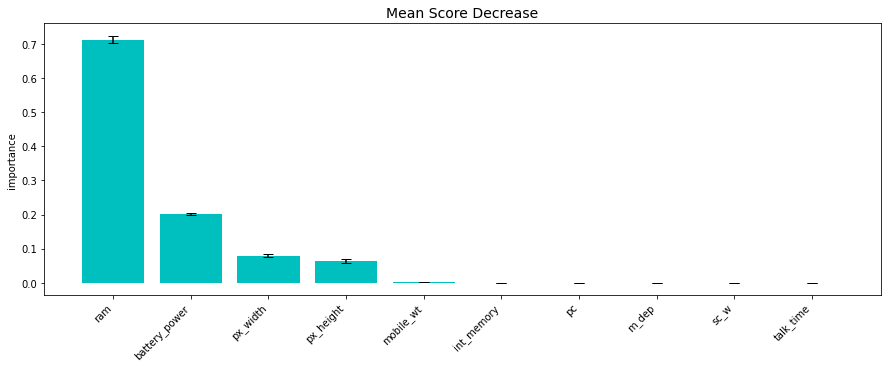

In [15]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

# Phase 2 : Use Importance Feature Only

In [16]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['battery_power', 'px_height', 'px_width', 'ram'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Training
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.4min finished


{'algo__max_depth': 20, 'algo__max_features': 0.6, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}
1.0 0.9031264858888864 0.945


# Phase 3 : Try Polynomial after feature selection

In [17]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['battery_power', 'px_height', 'px_width', 'ram'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Training
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.4min finished


{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
1.0 0.9262530654692891 0.95


# Phase 4

In [20]:
demo.grid_vs_random_search()

interactive(children=(Checkbox(value=False, description='show_score'), Output()), _dom_classes=('widget-intera…

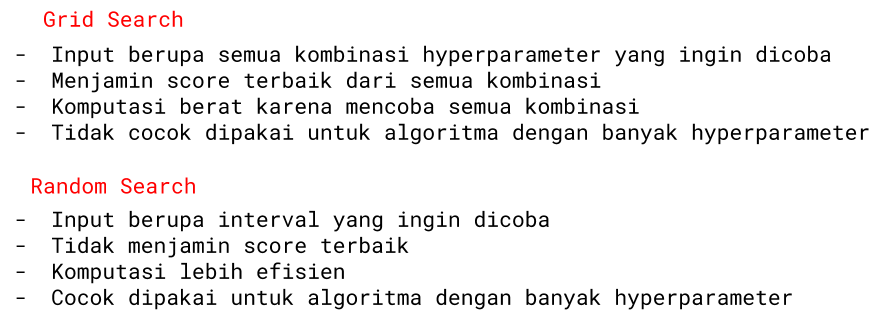

In [21]:
illustration.grid_random_comparison

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [25]:
rsp.rf_poly_params

{'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20),
 'algo__n_estimators': Integer(low=100, high=200),
 'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False]}

In [26]:
# Pipeline
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['battery_power', 'px_height', 'px_width', 'ram'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Training
model = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


{'algo__max_depth': 71, 'algo__max_features': 0.32218845655474115, 'algo__min_samples_leaf': 7, 'algo__n_estimators': 101, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.985625 0.928131580365069 0.95


# Save Model

In [27]:
save_model(model.best_estimator_, "rf_mobile.pkl")

Model is pickled as model/rf_mobile.pkl
